In [6]:
import sys
import os
from datetime import timedelta, datetime

SCRIPT_DIR = os.path.abspath(os.path.join('..'))
sys.path.append(os.path.dirname(SCRIPT_DIR))
from features.steps.time_series_generator import generate_timeseries, NoiseConfig, SeasonalityConfig, TimeConfig
from mockseries.transition import LinearTransition, LambdaTransition

Default Behaviour

By default the switch tranisition will be immedeate 

<Axes: xlabel='ds'>

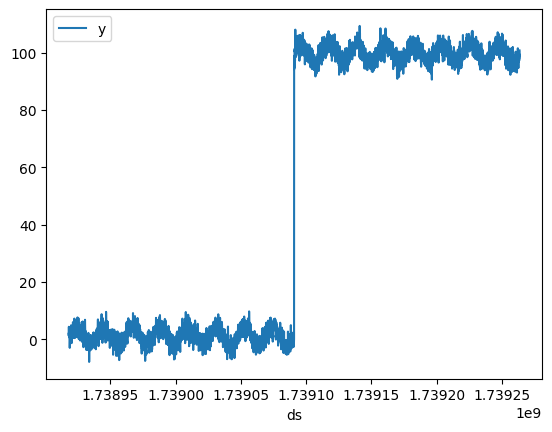

In [7]:
metrics = generate_timeseries(
    TimeConfig(start_value=1, end_value=100, duration=timedelta(days=4), transition_start=timedelta(days=2)))
metrics.plot(x="ds", y="y")

Linear Transition 

transition start at dat and completes in 1 day duration . Complete duration is 4 days

<Axes: xlabel='ds'>

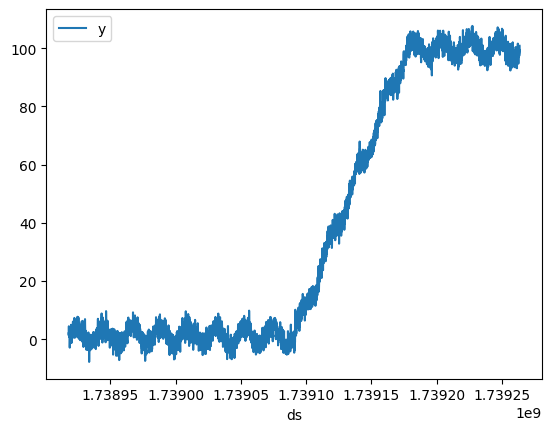

In [8]:
metrics = generate_timeseries(TimeConfig(start_value=1, end_value=100,
                                         transition_start=timedelta(days=2),
                                         duration=timedelta(days=4),
                                         transition=LinearTransition(transition_window=timedelta(days=1))))
metrics.plot(x="ds", y="y")

Custom Transition

Custom transition can be added by using lambda tranistion . In below case we are applying a square function for transition 

<Axes: xlabel='ds'>

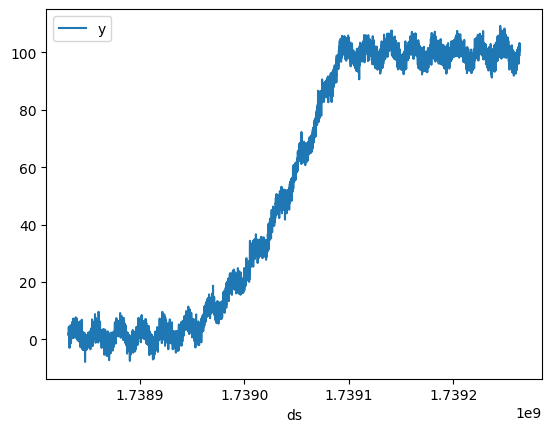

In [9]:
metrics = generate_timeseries(TimeConfig(start_value=1,
                                         end_value=100,
                                         transition_start=timedelta(days=1),
                                         duration=timedelta(days=5),
                                         transition=LambdaTransition(
                                             transition_window=timedelta(days=2),
                                             transition_function=lambda x: x * x,
                                         )))

metrics.plot(x="ds", y="y")

Removing Noise

<Axes: xlabel='ds'>

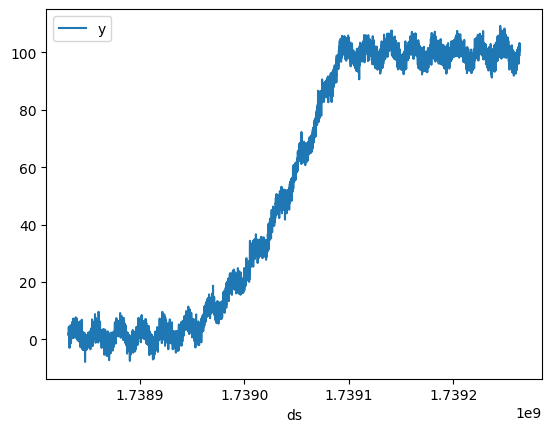

In [10]:
metrics = generate_timeseries(TimeConfig(start_value=1,
                                         end_value=100,
                                         transition_start=timedelta(days=1),
                                         duration=timedelta(days=5),
                                         transition=LambdaTransition(
                                             transition_window=timedelta(days=2),
                                             transition_function=lambda x: x * x,
                                         ),
                                         noise_config=NoiseConfig(enable=False)))

metrics.plot(x="ds", y="y")

Removing Seasonality

<Axes: xlabel='ds'>

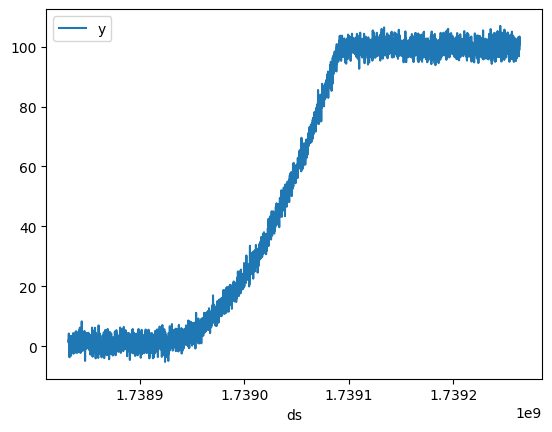

In [11]:
metrics = generate_timeseries(TimeConfig(start_value=1,
                                         end_value=100,
                                         transition_start=timedelta(days=1),
                                         duration=timedelta(days=5),
                                         transition=LambdaTransition(
                                             transition_window=timedelta(days=2),
                                             transition_function=lambda x: x * x,
                                         ),
                                         noise_config=NoiseConfig(enable=False)),
                              seasonality_config=SeasonalityConfig(enable=False))

metrics.plot(x="ds", y="y")
